# Plot Organization in matplotlib — Your One-stop Guide
by Mathian Calderini

https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801

If you are reading this, it is probably because you agree with me that most matplotlib tutorials out there are missing a crucial aspect of plotting and data visualization.

While there might be thousands of tutorials on how to change line thickness or the size of your titles, they all seem to forget that organization of subplots plays a huge role in conveying the story your data is telling. Sometimes you might want to emphasize the importance of a plot by making it bigger, or complement a plot by adding another one as an inset on top of it.

To do those edits, I have seen (too) many people save individual plots done with Python and later re-arrange it all together on some other image editing software. Not only is this inefficient, it is not scalable to high volume plotting or to plots that you need to tweak and/or redo multiple times.

For all those friends and for all of you out there still struggling with such problems, here is your one-stop guide on how to organize your plots and subplots using only *matplotlib* on Python.

A picture is worth a thousand words, so for those that want a quick preview, those that are re-reading this, or those with TLDR syndrome, here is a sample code for what we will accomplish in this tutorial:

In [1]:
## Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [2]:
## Build some data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))
print(time)

[ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
  0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
  0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
  0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
  0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
  0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
  0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
  0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
  0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
  0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
  0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
  0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
  0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
  0.78078078  0.79079079  0.8008008   0.81081081  0

In [ ]:
## Create a figure with 4 subplots
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)   #Used to specify the geometry of the grid to place a subplot

## Plot the data 
ax0 = fig.add_subplot(gs[0, 0])  ##reference array here with gs
ax0.plot(time, height)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(time, score)

ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2]) #specify location of the axes
ax3.hist(distribution)

## Save it to your current work space
fig.savefig('figures/allElements.png')

And here is a schematic of how we will approach the issue of subplot organization:

![Image did not properly render](Figures/OrganizationSchematic_Full.png "Organization schematic - Full")

If that piqued your interest or if you are back to review what you read before, welcome to the comprehensive beginner tutorial on organizing your plots in Python using *matplotlib*! 

The way we will approach the issue of organization is by clarifying the distinction  between figures, subplots and axes, and how we can optimize it with matplotlib's gridSpec. Without further ado, let's start with the first and most basic one.

# Figure - Your Frame
The most basic element of a *matplotlib* plot is the **figure**. The figure object should be considered as your **frame**. Imagine any visualization as a potential collage of graphs and the figure as the place where all those graphs are pasted and moved around. 

Just like a picture frame though, the figure by itself is an empty structure waiting for content. This is the first element of our initial schematic:

![Image did not properly render](Figures/OrganizationSchematic_Figure.png "Organization schematic - Figure only")

In *matplotlib*, we create the figure object when using the line ```fig = plt.figure()```. We can also omit to put "fig =" . This is simply so we store the figure object in some variable in case we needed to use it later. For example, if you wanted to save the figure as an image with ```fig.save()```. If you were to save the newly created figure, you'll see your beautiful newly created blank image.

If all you wanted was to plot a single graph, then you wouldn't need to think about axes or subplots. You could simply do it like this:

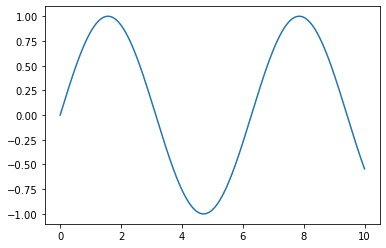

In [3]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)

# Plotting on a figure
fig = plt.figure()
plt.plot(time, height)
fig.savefig('figures/basicFigure.png')
plt.show()

We can deconstruct the previous block of code:
* ```plt.figure()``` creates a figure object
* ```plt.plot(time, height)``` will take the available space and draw the relationship between time (x-axis) and height (y-axis)
* ```plt.show()``` will simply render the plot. This is not necessary in notebooks, but it is good practice in case you are coding on a text editor or a less interactive editor than the one we use here.

If you had more data, you could add more lines to this simple plot. But what if we wanted to plot a second variable, on a different plot? That's where the axes and subplots become useful.

# Axes - The plotting canvas

While the figure object was your plotting frame, the canvas on which you will be drawing is the axes object. By themselves, axes are free-floating, meaning that they can be put in any position on the figure. We can add them to our orignal schematic:

![Image did not properly render](Figures/OrganizationSchematic_FigureAxes.png "Organization schematic - Figure and Axes")

In code, this is simply done like this:

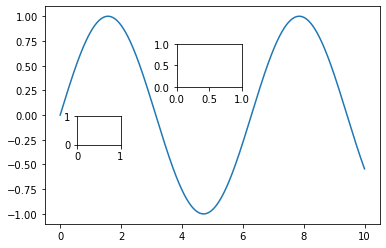

In [6]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# Adding new empty axes
fig.add_axes([0.43, 0.6, 0.15, 0.15])  #[lowerCorner_x, lowerCorner_y, width, height]
fig.add_axes([0.2, 0.4, 0.1, 0.1])     #[lowerCorner_x, lowerCorner_y, width, height]

fig.savefig('figures/figureAxes.png')
plt.show()

Here we see that the ```add_axes([left, bottom, width, height])``` function added two new plotting areas onto the original plot. The specific position and size of the new axes are specified in the respective input arrays of the functions.

However, adding empty axes doesn't serve much purpose, so let's see how to use them to plot:

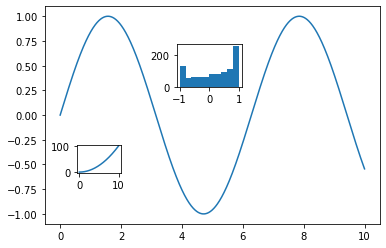

In [7]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# First new axes
ax1 = fig.add_axes([0.43, 0.6, 0.15, 0.15])
ax1.hist(height)

# Second new axes
ax2 = fig.add_axes([0.2, 0.3, 0.1, 0.1])
ax2.plot(time, time**2)

fig.savefig('figures/figureAxes2.png')
plt.show()

In this example, we see that ```add_axes()``` actually gives or *returns* the actual axes object onto which we can plot, which we stored in the variables ax1 and ax2. We can then use these variables to plot different meaningful data that add value to our plot similarly to how we did it before.

In this case, we added a histogram of the height values and we plotted the square of time (which is not very meaningful information other than to show how to plot on axes).

# Subplots - Organize multiple axes

The distinction between subplots and axes is not particularly clear when one first learns to plot with *matplotlib*. That is because, normally, subplots are introduced before introducing axes. As you'll see now, that tiny detail can change your whole perception of how one organizes their visualization.

In a nutshell, **subplots** are simply a way to organize your free floating axes into a rigid grid. You can imagine that *subplots* creates a table, and each individual cell of the table is a new axes for you to fill with data. Just like in this new take on the original schematic:

![Image did not properly render](figures/OrganizationSchematic_FigureAxesSubplot.png "Organization schematic - Subplots")

This is how one can use subplots:

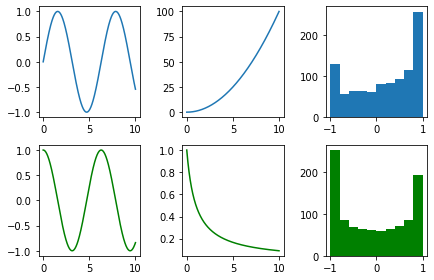

In [8]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = np.cos(time)

# Plotting all the subplots
fig, axes = plt.subplots(2, 3)

axes[0, 0].plot(time, height)
axes[0, 1].plot(time, time**2)
axes[0, 2].hist(height)

axes[1, 0].plot(time, weight, color='green')
axes[1, 1].plot(time, 1/(time+1), color='green')
axes[1, 2].hist(weight, color='green')

plt.tight_layout()
fig.savefig('figures/figureAxesSubplots.png')
plt.show()

Again, let's take it one line at at time:
* ```plt.subplots()```, created a grid (2 rows and 3 columns). The function returned the figure object (stored in ```fig```) that will hold all the subplots, as well as all the individual axes (stored in ```axes```).
* The axes are contained on a 2D numpy array (a matrix or table if you prefer) and can be accessed individually by their position. For example, the top-left axes with ```axes[0, 0]```. If we had tons of plots to make, here we could iterate through these positions to plot them individually.
* ```plt.tight_layout()``` is normally used when using ```plt.subplots()``` to make sure the axis ticks and labels don't overlap across subplots. Feel free to remove it to see what this means.

I highly recommend looking at the [official documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html) for further customization of the subplot grid, such as spacing between rows/columns or whether axis are shared. 

So we know how to plot multiple graphs either at specific, free floating locations and under a well structured grid. What else is there to do in terms of organization then? Well, what if we wanted to put emphasis on one plot by making it twice as big as another one? What if we wanted to create some type of tiled gallery of plots? This is where GridSpec becomes useful. 

# GridSpec - A Flexible Organization

The way GridSpec works is that, as with subplots, one defines a grid. However, instead of automatically associating an axes to each cell of the grid, one can select how many cells each individual plotting area will occupy. So if we wanted a plot to occupy twice the area of another plot, we could associate it to twice the number of cells in the grid.

Let's see this in code:

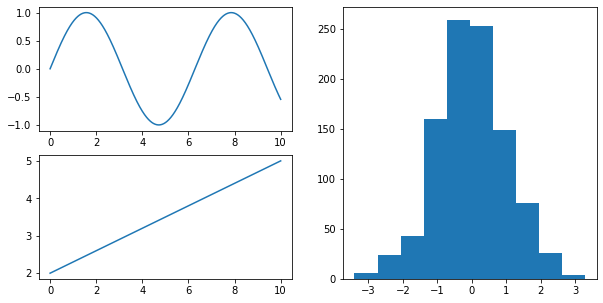

In [9]:
# A new set of data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
distribution = np.random.normal(0, 1, len(time))

# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)

fig.savefig('figures/gridspec.png')
plt.show()

* We first create the (2 by 2) grid with  ```gs = gridspec.GridSpec(nrows=2, ncols=2)```.
* ```fig.add_subplot(gs[0, 0])``` will take a subset of these cells by accesing them by index ```[0, 0]``` in this case.
* This subset can include multiple cells of our gridSpec grid, simply by accesing more than one cell as with ```ax2 = fig.add_subplot(gs[:, 1])``` which selects for all rows and the second column.

We can further customize our plots by setting each row or column's size. Meaning that some rows could be narrower or wider than others. For example:

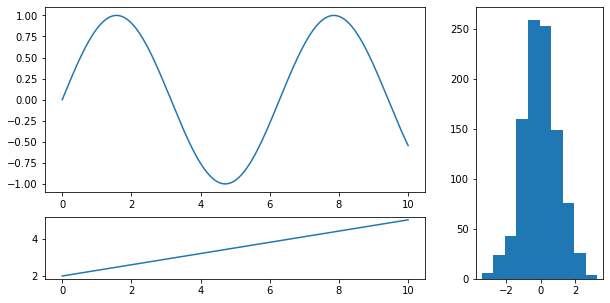

In [10]:
# Setting up the plot surface
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 1], height_ratios=[3, 1])

# First axes
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

# Second axes
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

# Third axes
ax2 = fig.add_subplot(gs[:, 1])
ax2.hist(distribution)

fig.savefig('figures/gridspceSpacings.png')
plt.show()

And with this, we can finally get to our original schematic: 

![Image did not properly render](Figures/OrganizationSchematic_Full.png "Organization schematic - Full")

From all we learned up to here, we can fully deconstruct the schematic: what we see here is that we applied a gridspec on a grid that is (5, 5), but with some rows being smaller than others. Then we added on subplot covering the whole first row, a subplot covering about half the third row, two subplots for the last row and 1 subplot covering the last column and last three rows. On top of this last subplot, we added two free floating axes.

As before, I highly recommend looking at the [official documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html) for further gridSpec customization, such as spacing between rows/columns or how to create nested gridSpecs.

And with that, hopefully now you know how you can structure your plots using **figures**, **axes**, **subplots** and **gridSpec**.